In [1]:
import pandas as pd
import os

In [2]:
cols = ['mean_fit_time', 'max_depth', 'max_features', 'n_estimators', 'mean_test_score', 'clf', 'data_id', 'max_leaves', 'clf_size_MB', 'delta']
df_out = pd.DataFrame(columns=cols)
lst_exc = []

for i,j,k in os.walk('output'):
    for f in k:
        fname = os.path.join('output', f)
        df = pd.read_csv(fname).iloc[:,1:]
        df['delta'] = None
        try:
            dff = df[cols]
            lst_delta = []
            df_delta = pd.DataFrame()
            for c in ['RF', 'OF']:
                tmp = dff.sort_values('mean_test_score', ascending=False).query(f'clf =="{c}"').head(1)
                lst_delta.append(tmp['mean_test_score'].values[0])
                df_delta = pd.concat([df_delta, tmp])
            df_delta['delta'] = lst_delta[1]-lst_delta[0]
            df_out = pd.concat([df_out, df_delta])
        except:
            lst_exc.append(fname)

In [3]:
df_out

,mean_fit_time,max_depth,max_features,n_estimators,mean_test_score,clf,data_id,max_leaves,clf_size_MB,delta
6,0.041488,5.0,NaN,50,0.855,RF,1049,13,0.008565,0.007
59,0.122968,10.0,sqrt,200,0.862,OF,1049,24,0.226058,0.007
3,0.0308,5.0,log2,50,0.853,RF,1050,16,0.009825,0.013
46,0.060712,5.0,sqrt,100,0.866,OF,1050,17,0.081962,0.013
42,0.028948,NaN,NaN,50,0.844,RF,1063,11,0.006638,0.003
...,...,...,...,...,...,...,...,...,...,...
83,0.127234,20.0,sqrt,200,0.69,OF,54,29,0.202781,0.023
20,2.877789,15.0,sqrt,200,0.941,RF,554,962,4.78053,0.001
95,25.349372,NaN,sqrt,200,0.942,OF,554,1027,236.632827,0.001
29,0.355839,20.0,sqrt,200,0.862,RF,6,506,4.852618,0.007


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

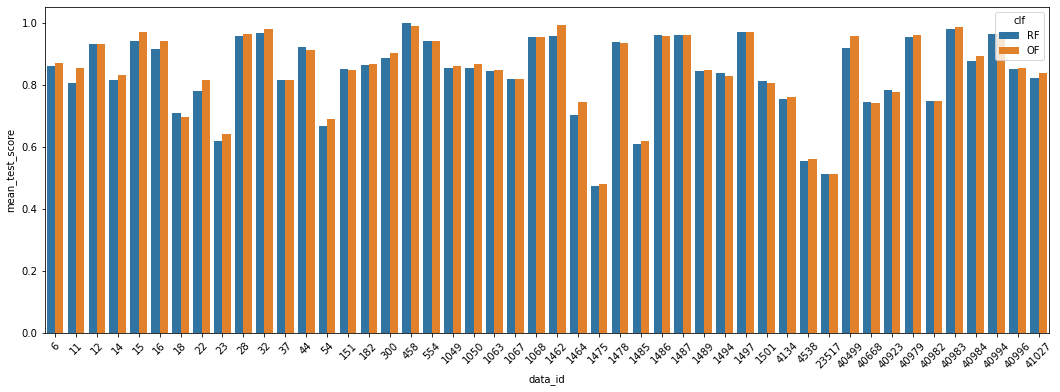

In [5]:
fig, ax = plt.subplots(1,1,figsize=(18,6))
sns.barplot(data=df_out, x='data_id', y='mean_test_score', hue='clf', ax=ax)
plt.xticks(rotation=45);

In [6]:
df2 = df_out.copy()
df2 = df2.query('clf=="OF"').reset_index(drop=True)

In [7]:
df2.head()

,mean_fit_time,max_depth,max_features,n_estimators,mean_test_score,clf,data_id,max_leaves,clf_size_MB,delta
0,0.122968,10.0,sqrt,200,0.862,OF,1049,24,0.226058,0.007
1,0.060712,5.0,sqrt,100,0.866,OF,1050,17,0.081962,0.013
2,0.032474,15.0,42,50,0.847,OF,1063,11,0.017836,0.003
3,0.040791,5.0,NaN,50,0.819,OF,1067,21,0.036855,0.0
4,0.06226,5.0,NaN,100,0.955,OF,1068,10,0.030747,0.0


In [8]:
order = list(df2.sort_values('delta')['data_id'])

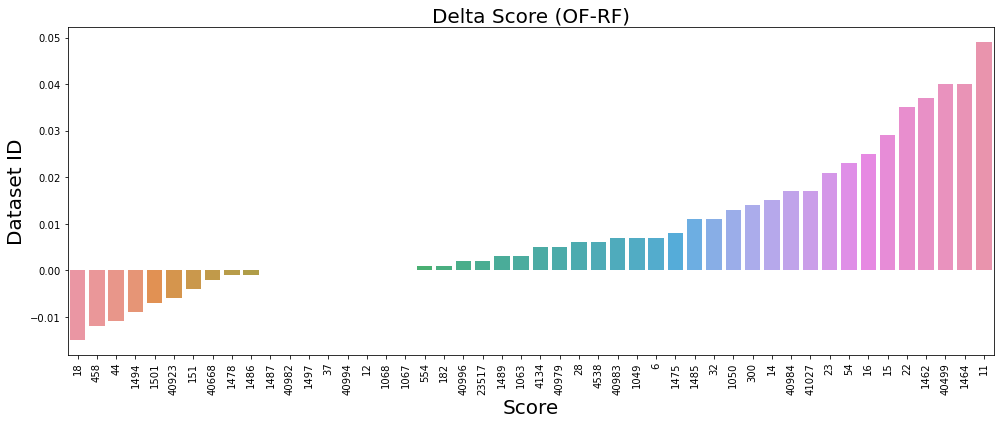

In [9]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
sns.barplot(data=df2, x='data_id', y='delta', ax=ax, order=order)
plt.xticks(rotation=90);
ax.set_title('Delta Score (OF-RF)', fontsize=20)
ax.set_xlabel('Score', fontsize=20)
ax.set_ylabel('Dataset ID', fontsize=20)
plt.tight_layout()
fig.savefig('delta_score.jpg')

#### Search params for specific data

In [10]:
df_out.query('data_id==11')

,mean_fit_time,max_depth,max_features,n_estimators,mean_test_score,clf,data_id,max_leaves,clf_size_MB,delta
1,0.052435,5.0,sqrt,100,0.805,RF,11,18,0.024684,0.049
52,0.054938,5.0,NaN,100,0.854,OF,11,19,0.028094,0.049


In [11]:
df_out.query('data_id==1464')

,mean_fit_time,max_depth,max_features,n_estimators,mean_test_score,clf,data_id,max_leaves,clf_size_MB,delta
5,0.111574,5.0,log2,200,0.703,RF,1464,16,0.03559,0.04
49,0.057982,5.0,log2,100,0.743,OF,1464,15,0.023527,0.04
